<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mouli\AppData\Local\Temp\ipykernel_9340\3340738001.py:18: SyntaxWarning: invalid escape sequence '\m'
  image = cv2.imread("C:\\Users\mouli\Downloads\jpg2png\DL_3.png")


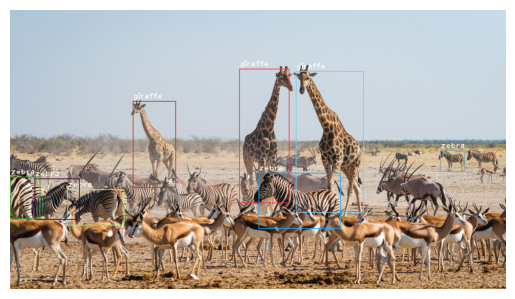

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained YOLO model
net = cv2.dnn.readNet("C:\\Users\\mouli\\OneDrive\\Desktop\\yolov3.weights", 
                      "C:\\Users\\mouli\\OneDrive\\Desktop\\yolov3.cfg")

# Load the class labels from COCO dataset
labels = []
with open("C:\\Users\\mouli\\OneDrive\\Desktop\\coco (1).names", 'r') as f:
    labels = f.read().splitlines()

# Define the animal classes from COCO dataset
animal_classes = ["dog", "cat", "bird", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe"]

# Load the input image
image = cv2.imread("C:\\Users\mouli\Downloads\jpg2png\DL_3.png")
if image is None:
    print("Error: Image could not be loaded.")
img_height, img_width = image.shape[:2]  # Get the dimensions of the image

# Preprocess the image to pass it to the YOLO model
input_blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), (0, 0, 0), swapRB=True, crop=False)
net.setInput(input_blob)

# Get YOLO's output layer names and perform a forward pass
layer_names = net.getUnconnectedOutLayersNames()
detections = net.forward(layer_names)

# Initialize lists to store bounding box coordinates, confidence scores, and class indices
bounding_boxes = []
conf_scores = []
class_indices = []

# Iterate through the detections
for detection in detections:
    for object_detection in detection:
        scores = object_detection[5:]
        best_class = np.argmax(scores)
        confidence_score = scores[best_class]
        if confidence_score > 0.7:  # Higher threshold for better accuracy
            label = labels[best_class]

            # Only process if the detected class is an animal
            if label in animal_classes:
                center_x = int(object_detection[0] * img_width)
                center_y = int(object_detection[1] * img_height)
                box_width = int(object_detection[2] * img_width)
                box_height = int(object_detection[3] * img_height)

                # Calculate top-left corner of the bounding box
                top_left_x = int(center_x - box_width / 2)
                top_left_y = int(center_y - box_height / 2)

                # Store the bounding box info
                bounding_boxes.append([top_left_x, top_left_y, box_width, box_height])
                conf_scores.append(float(confidence_score))
                class_indices.append(best_class)

# Apply Non-Maximum Suppression (NMS) to reduce overlapping boxes
indices = cv2.dnn.NMSBoxes(bounding_boxes, conf_scores, 0.5, 0.4)

# Set font and generate random colors for each detected object
font_style = cv2.FONT_HERSHEY_PLAIN
random_colors = np.random.randint(0, 255, size=(len(bounding_boxes), 3), dtype='uint8')

# If any valid bounding boxes exist, display them on the image
if len(indices) > 0:
    indices = indices.flatten()  # Flatten the list

    for i in indices:
        x, y, w, h = bounding_boxes[i]
        obj_label = str(labels[class_indices[i]])
        box_color = [int(c) for c in random_colors[i]]
        cv2.rectangle(image, (x, y), (x + w, y + h), box_color, 2)
        cv2.putText(image, obj_label, (x, y - 10), font_style, 2, (255, 255, 255), 2)

# Convert the image to RGB and display it using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()